In [134]:
# stdlib imports
import os
from pathlib import Path
from datetime import timedelta

# external imports
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

In [135]:
RUNS = ['WCP', 'LEJOG']

# length of each run (miles)
LENGTHS = {
    'WCP': 870,
    'LEJOG': 874
}

# target lengths
TARGETS = [365,350,300,250,200,150]

# how many miles should we run each day for the given target?
RATES = {}
for run in RUNS:
    RATES[run] = {}
    for target in TARGETS:
        RATES[run][target] = LENGTHS[run]/target

In [136]:
# all the data is in the dropbox
DATA_FILE = Path.home() / 'Dropbox' / 'home' / 'shared' / 'martin' / 'WCP.xlsx'
DATA_FILE

PosixPath('/Users/martinchorley/Dropbox/home/shared/martin/WCP.xlsx')

In [144]:
OUTPUT_DIR = Path.cwd() / 'src'
OUTPUT_DIR

PosixPath('/Users/martinchorley/Desktop/wcp-lejog-analysis/src')

In [137]:
# let's read in the run data
run_data = pd.read_excel(DATA_FILE, sheet_name=['WCP', 'LEJOG'], header=1)
run_data

{'WCP':      Day       Date  Mileage  Cumulative  Daily Rate  Remaining  Pace Required
 0      1 2020-06-15     0.00        0.00    0.000000     870.00       2.390110
 1      2 2020-06-16     6.29        6.29    3.145000     863.71       2.379366
 2      3 2020-06-17     0.00        6.29    2.096667     863.71       2.385939
 3      4 2020-06-18     3.71       10.00    2.500000     860.00       2.382271
 4      5 2020-06-19     2.85       12.85    2.570000     857.15       2.380972
 ..   ...        ...      ...         ...         ...        ...            ...
 361  362 2021-06-11      NaN      113.65    0.313950     756.35     252.116667
 362  363 2021-06-12      NaN      113.65    0.313085     756.35     378.175000
 363  364 2021-06-13      NaN      113.65    0.312225     756.35     756.350000
 364  365 2021-06-14      NaN      113.65    0.311370     756.35            NaN
 365  366 2021-06-15      NaN      113.65    0.310519     756.35            NaN
 
 [366 rows x 7 columns],
 'LEJO

In [138]:
# drop the days we didn't run (or haven't run yet)
for run in RUNS:
    run_data[run] = run_data[run].dropna()
    
for run, r in run_data.items():
    print(run)
    display(r)

WCP


,Day,Date,Mileage,Cumulative,Daily Rate,Remaining,Pace Required
0,1,2020-06-15,0.00,0.00,0.000000,870.00,2.390110
1,2,2020-06-16,6.29,6.29,3.145000,863.71,2.379366
2,3,2020-06-17,0.00,6.29,2.096667,863.71,2.385939
3,4,2020-06-18,3.71,10.00,2.500000,860.00,2.382271
4,5,2020-06-19,2.85,12.85,2.570000,857.15,2.380972
5,6,2020-06-20,3.78,16.63,2.771667,853.37,2.377075
6,7,2020-06-21,0.00,16.63,2.375714,853.37,2.383715
7,8,2020-06-22,9.92,26.55,3.318750,843.45,2.362605
8,9,2020-06-23,0.00,26.55,2.950000,843.45,2.369242
9,10,2020-06-24,4.42,30.97,3.097000,839.03,2.363465


LEJOG


,Day,Date,Mileage,Cumulative,Daily Rate,Remaining,Pace Required
0,1,2020-07-13,12.99,12.99,12.990000,861.01,2.365412
1,2,2020-07-14,0.00,12.99,6.495000,861.01,2.371928
2,3,2020-07-15,0.00,12.99,4.330000,861.01,2.378481
3,4,2020-07-16,6.45,19.44,4.860000,854.56,2.367202
4,5,2020-07-17,0.00,19.44,3.888000,854.56,2.373778
5,6,2020-07-18,3.12,22.56,3.760000,851.44,2.371699
6,7,2020-07-19,0.00,22.56,3.222857,851.44,2.378324
7,8,2020-07-20,9.37,31.93,3.991250,842.07,2.358739


In [139]:
# how many miles have we got left to do, and how many are we doing on average every day

CURRENT_RATES = {}
REMAINING = {}

for run in RUNS:
    last_run = run_data[run].iloc[-1]
    CURRENT_RATES[run] = last_run['Cumulative']/last_run['Day']
    REMAINING[run] = LENGTHS[run] - last_run['Cumulative']
    
print(CURRENT_RATES)
print(REMAINING)

{'WCP': 3.1569444444444446, 'LEJOG': 3.99125}
{'WCP': 756.35, 'LEJOG': 842.07}


In [140]:
DAYS_TO_FINISH = {}
for run in RUNS:
    DAYS_TO_FINISH[run] = REMAINING[run] / CURRENT_RATES[run]
print(DAYS_TO_FINISH)

{'WCP': 239.5829300483942, 'LEJOG': 210.97901659880992}


In [141]:
PROJECTED_END = {}
for run in RUNS:
    first_run = run_data[run].iloc[0]
    start_date = first_run['Date']
    PROJECTED_END[run] = (start_date + timedelta(days=DAYS_TO_FINISH[run])).date()
print(PROJECTED_END)

{'WCP': datetime.date(2021, 2, 9), 'LEJOG': datetime.date(2021, 2, 8)}


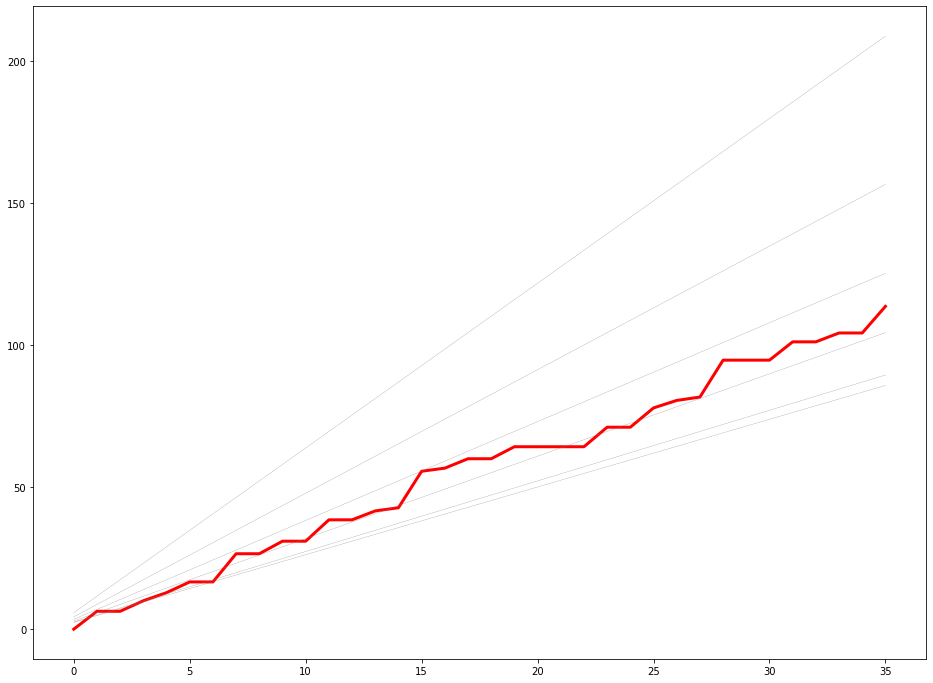

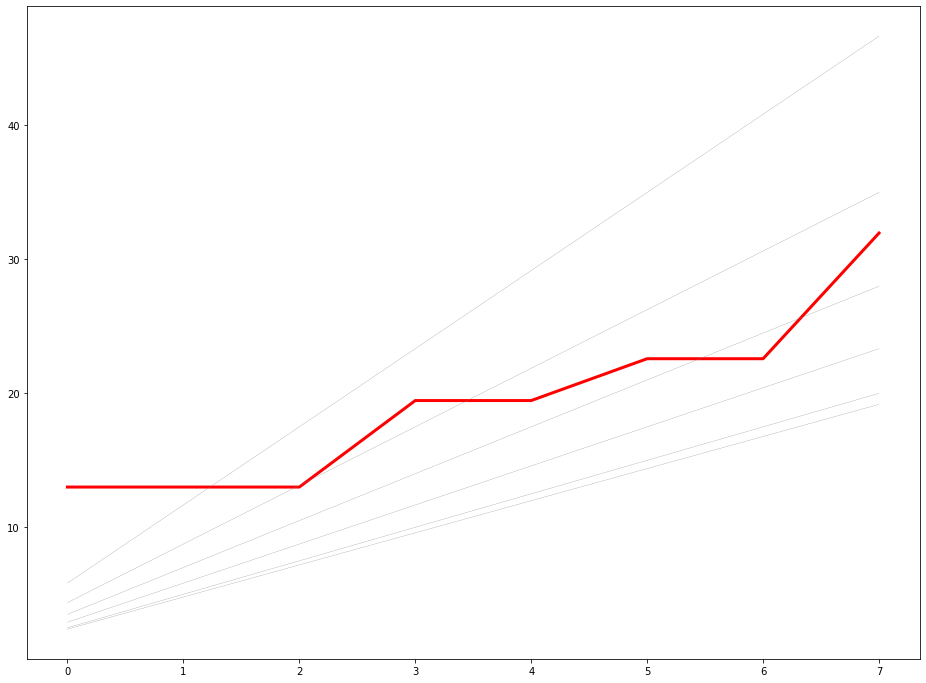

In [142]:
for run in RUNS:
    fig, ax = plt.subplots(figsize=[16,12])
    plt.plot(run_data[run]['Cumulative'], color='red', linewidth=3)
    for key, rate in RATES[run].items():
        plt.plot([rate*y for y in range(1,run_data[run].iloc[-1]['Day']+1)], label=key, linewidth=0.25, color='gray')

In [146]:
for run in RUNS:
    for key, rate in RATES[run].items():
        run_data[run][key] = run_data[run]['Day'] * rate
        
print(run_data)

for run in RUNS:
    with open(OUTPUT_DIR / '{}.csv'.format(run), 'w') as output_file:
        run_data[run].to_csv(output_file)

{'WCP':     Day       Date  Mileage  Cumulative  Daily Rate  Remaining  Pace Required  \
0     1 2020-06-15     0.00        0.00    0.000000     870.00       2.390110   
1     2 2020-06-16     6.29        6.29    3.145000     863.71       2.379366   
2     3 2020-06-17     0.00        6.29    2.096667     863.71       2.385939   
3     4 2020-06-18     3.71       10.00    2.500000     860.00       2.382271   
4     5 2020-06-19     2.85       12.85    2.570000     857.15       2.380972   
5     6 2020-06-20     3.78       16.63    2.771667     853.37       2.377075   
6     7 2020-06-21     0.00       16.63    2.375714     853.37       2.383715   
7     8 2020-06-22     9.92       26.55    3.318750     843.45       2.362605   
8     9 2020-06-23     0.00       26.55    2.950000     843.45       2.369242   
9    10 2020-06-24     4.42       30.97    3.097000     839.03       2.363465   
10   11 2020-06-25     0.00       30.97    2.815455     839.03       2.370141   
11   12 2020-06-26  